# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Introduction 

**Capstone Project for 'IBM Professional Certificate in Data Science with Python'**   
In this project, I constructed a machine learning model that can predict whether Falcon 9 will land successfuly in the first stage. [Falcon 9](https://www.spacex.com/vehicles/falcon-9/) is classified as a medium-lift partially reusable rocket, used to launch hefty communications and satellites into Earth orbit or ferry austronaouts to and from the International Space Station. As of April 2022, SpaceX offers Falcon 9 rocket launches for [USD 62 million](https://www.nbcnews.com/science/space/space-launch-costs-growing-business-industry-rcna23488), which means around USD 1,200 per pound of payload. For comparison, per pound cost of SpaceX competitors is 3 to 5 times more expensive, whereas traditional NASA space shuttles, retired in 2011, cost an average of [USD 1.6 billion](https://aerospace.csis.org/data/space-launch-to-low-earth-orbit-how-much-does-it-cost/) per flight. SpaceX is able to provide rocket launches for unprecedented low prices, because it can reuse the first stage, which significantly reduces the demand for new cores. Therefore, determining whether the first stage will land, helps to estimate the cost of a launch. This information can also be used if another company wants to bid against SpaceX for a rocket launch. For this project, I use API requests to pull data from <code>https://api.spacexdata.com/v4</code> and webscraping to collect data from Wikipedia. 


--- 

# Part 4: Data Exploration and Feature Engineering  
> Objectives: 
*   Exploratory Data Analysis
*   Preparing Data  
*   Feature Engineering 

In this lab, I complete Exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`  

### 0. Import Libraries and the data set 


We will import the following libraries the lab


In [2]:
# A software library written for Python for data manipulation and analysis.
import pandas as pd

#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns 
import io 

**Read the SpaceX dataset into a Pandas dataframe and print its summary**  

In [3]:
df=pd.read_csv('dataset_part_2.csv')
df.head(5) 

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Exploratory Data Analysis 

### 1. Visualize the relationship between Flight Number and PayloadMass 

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return. 


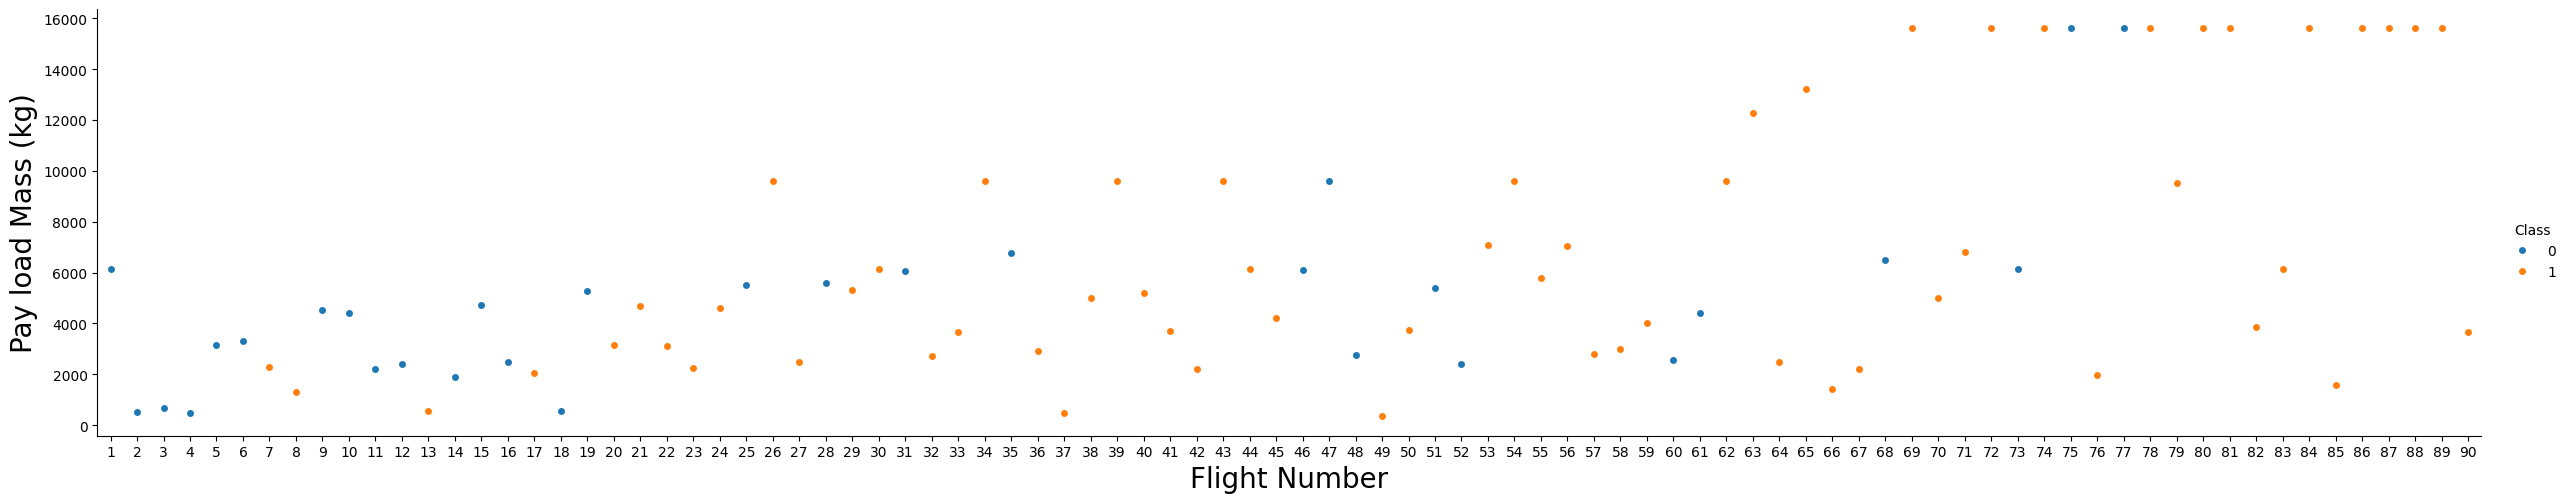

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show() 

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.  
Next, let's drill down to each site visualize its detailed launch records. 

### 2. Visualize the relationship between Flight Number and Launch Site 

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code> 


Text(0, 0.5, 'Launch Site')

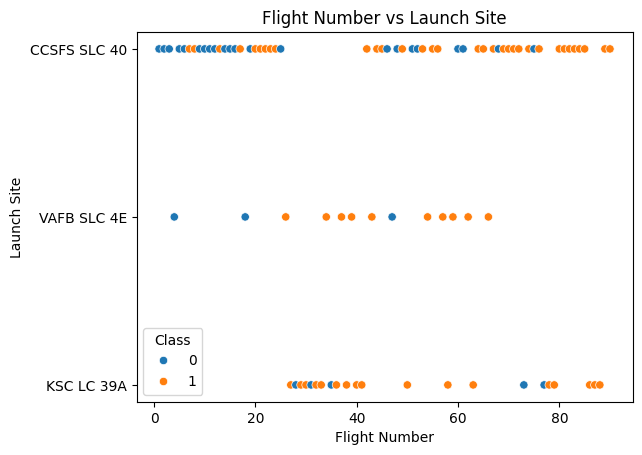

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value 
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df) 
plt.title("Flight Number vs Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site") 

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

### 3. Payload vs Launch Site 

We also want to observe if there is any relationship between launch sites and their payload mass. 

Text(0, 0.5, 'Launch Site')

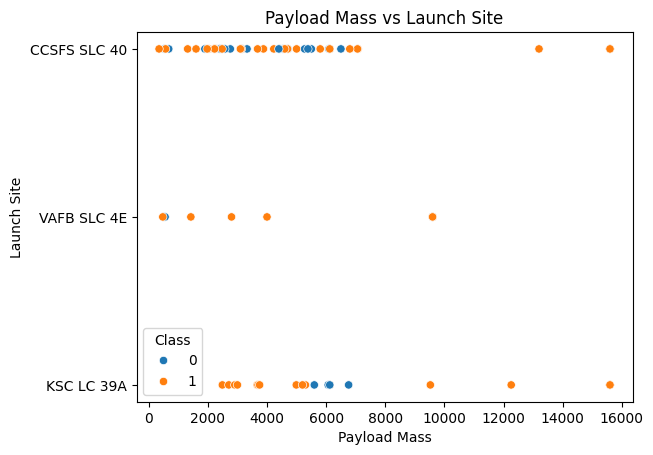

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value 
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.title("Payload Mass vs Launch Site")
plt.xlabel("Payload Mass")
plt.ylabel("Launch Site") 

We observe that for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000). 

### 4. Visualize the relationship between success rate of each orbit type 

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a `bar chart` for the sucess rate of each orbit 

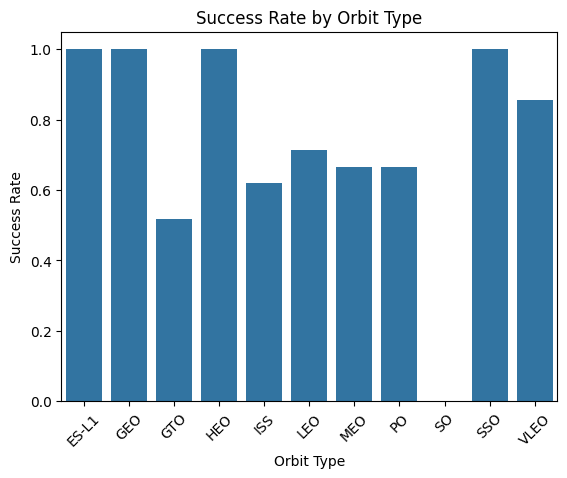

In [7]:
# Calculate the mean of 'class' for each 'Orbit', which gives the success rate
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Create a bar chart
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class')

# Enhancing the plot
plt.title("Success Rate by Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability if needed
plt.show() 


Analyze the ploted bar chart try to find which orbits have high sucess rate.

### 5. Visualize the relationship between FlightNumber and Orbit type 

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type. 

Text(0, 0.5, 'Orbit')

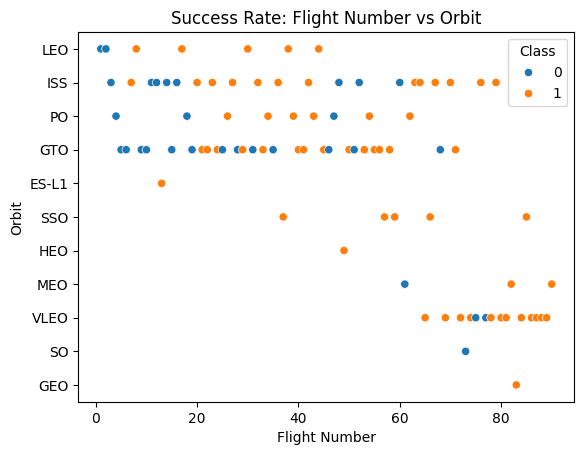

In [8]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value 
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df) 
plt.title("Success Rate: Flight Number vs Orbit")
plt.xlabel("Flight Number")
plt.ylabel("Orbit")  

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### 6. Visualize the relationship between Payload and Orbit type 

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


<Axes: xlabel='PayloadMass', ylabel='Orbit'>

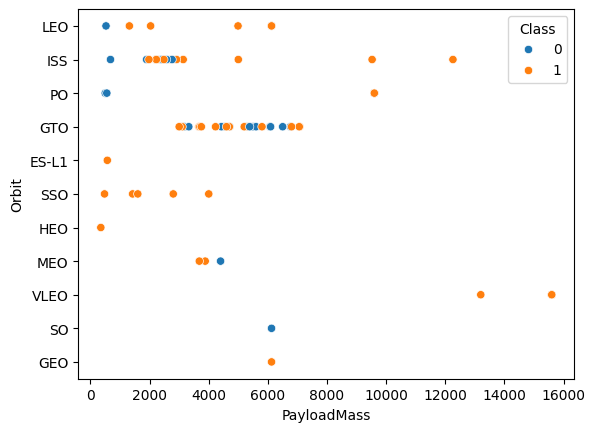

In [9]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value 
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df) 

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### TASK  6: Visualize the launch success yearly trend 

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


<Axes: xlabel='Date', ylabel='Class'>

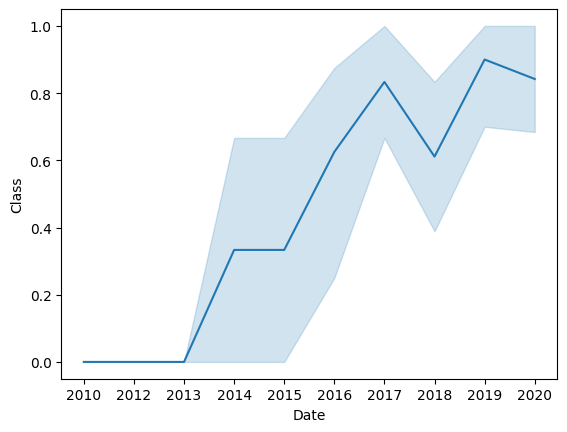

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate 
sns.lineplot(data=df, x="Date", y="Class") 

We can observe that the sucess rate has kept increasing since 2013


## Features Engineering 

By now, we have preliminary insights about how each important variable would affect the success rate. We will select the features that will be used in success prediction in the future module.


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head() 

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### 7. Create dummy variables to categorical columns 

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [32]:
# Convert 'GridFins', 'Reused', and 'Legs' to string type
features[['GridFins', 'Reused', 'Legs']] = features[['GridFins', 'Reused', 'Legs']].astype(str)

# Apply pd.get_dummies() to the specified categorical columns
one_hot_encoded_data = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial', 'GridFins', 'Reused', 'Legs']])

# Drop the original categorical columns along with 'LandingPad', 'Reused', 'Serial', 'Legs', and 'GridFins'
features_dropped = features.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial', 'GridFins', 'Reused', 'Legs'], axis=1)

# Concatenate the modified features DataFrame with the one-hot encoded DataFrame
features_one_hot = pd.concat([features_dropped, one_hot_encoded_data], axis=1)


/var/folders/rq/tk4wmjys1yx35sh_tx_8ssgr0000gn/T/ipykernel_45491/1633455075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['GridFins', 'Reused', 'Legs']] = features[['GridFins', 'Reused', 'Legs']].astype(str)


In [35]:
# To confirm that the increase in columns is as expected, we check the number of unique values in each categorical column 
print("Unique values in 'Orbit':", features['Orbit'].nunique())
print("Unique values in 'LaunchSite':", features['LaunchSite'].nunique())
print("Unique values in 'LandingPad':", features['LandingPad'].nunique())
print("Unique values in 'Serial':", features['Serial'].nunique())
print("Number of varibles in the features_one_hot dataframe:", features_one_hot.shape[1] ) 

Unique values in 'Orbit': 11
Unique values in 'LaunchSite': 3
Unique values in 'LandingPad': 5
Unique values in 'Serial': 53
Number of varibles in the features_one_hot dataframe: 83


In [34]:
# Display the first few rows of the resulting DataFrame
features_one_hot.tail() 

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
85,86,15600.0,2,5.0,12,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True
86,87,15600.0,3,5.0,13,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,True
87,88,15600.0,6,5.0,12,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
88,89,15600.0,3,5.0,12,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True
89,90,3681.0,1,5.0,8,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,True


### 8. Cast all numeric columns to `float64` 

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

In [36]:
# HINT: use astype function
# Cast the entire DataFrame to float64
features_one_hot = features_one_hot.astype('float64')

# Display the data types of the DataFrame to confirm the change
features_one_hot.dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

In [37]:
features_one_hot 

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6123.547647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15600.000000,3.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15600.000000,6.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15600.000000,3.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [38]:
# save as a csv file
features_one_hot.to_csv('dataset_part_3.csv', index=False) 